# Kaggle [Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic/overview) contest

The objective of this contest is to evaluate if certain passengers were transported or not.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train_data = pd.read_csv("./train.csv")
train_data.head()

test_data = pd.read_csv("./test.csv")
numberOfTrees=200
maximumDepth=5
minimumLeaves=10
minimumSplit=20

./SpaceshipTitanic.ipynb
./submissio300Trees.csv
./submission.csv
./submission100Trees.csv
./submission200Trees10MaxDepth.csv
./submissionTestingSettings.csv
./test.csv
./train.csv


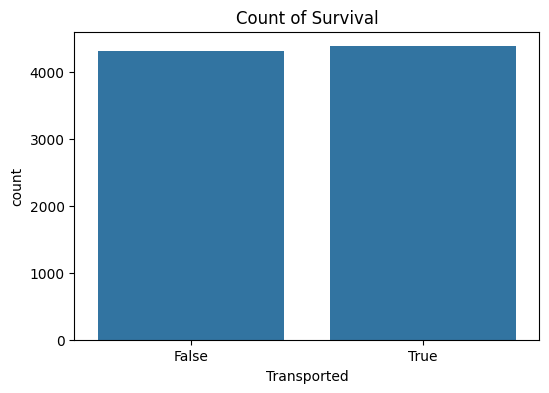

% of passanger survived in train dataset:  49.637639480041415
% of passanger not survived in train dataset:  50.362360519958585


In [4]:
# Checking data

fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='Transported', data=train_data)
plt.title("Count of Survival")
plt.show()

n=len(train_data)
surv_0=len(train_data[train_data['Transported']==True])
surv_1=len(train_data[train_data['Transported']==False])

print("% of passanger survived in train dataset: ",surv_1*100/n)
print("% of passanger not survived in train dataset: ",surv_0*100/n)

In [11]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [12]:
# Test Data parsing
Seperate_Passenger_ID = test_data["PassengerId"].str.split("_", n=1, expand=True)
test_data["PassengerGroup"]=Seperate_Passenger_ID[0]
test_data["PassengerNumber"]=Seperate_Passenger_ID[1]

Seperate_Cabin=test_data["Cabin"].str.split("/", n=2, expand=True)
test_data["Deck"]=Seperate_Cabin[0]
test_data["DeckNumber"]=Seperate_Cabin[1]
test_data["DeckSide"]=Seperate_Cabin[2]
test_data.drop(columns=["Cabin"], inplace=True)


In [13]:
# Train Data parsing

Seperate_Passenger_ID = train_data["PassengerId"].str.split("_", n=1, expand=True)
train_data["PassengerGroup"]=Seperate_Passenger_ID[0]
train_data["PassengerNumber"]=Seperate_Passenger_ID[1]

Seperate_Cabin=train_data["Cabin"].str.split("/", n=2, expand=True)
train_data["Deck"]=Seperate_Cabin[0]
train_data["DeckNumber"]=Seperate_Cabin[1]
train_data["DeckSide"]=Seperate_Cabin[2]
train_data.drop(columns=["Cabin"], inplace=True)

In [14]:
train_data['DeckNumber'] = train_data['DeckNumber'].astype('Int64')
train_data['PassengerGroup'] = train_data['PassengerGroup'].astype('Int64')
train_data['PassengerNumber'] = train_data['PassengerNumber'].astype('Int64')
train_data['CryoSleep'] = train_data['CryoSleep'].map({'True': True, 'False': False})
train_data['HomePlanet'] = train_data['HomePlanet'].map({'Earth': 0, 'Europa': 1, 'Mars': 2})
train_data['Destination'] = train_data['Destination'].map({'55 Cancri e': 0, 'PSO J318.5-22': 1,'TRAPPIST-1e': 2})
train_data['Deck'] = train_data['Deck'].map({'A': 0,'B': 1,'C': 2,'D': 3,'E': 4,'F': 5,'G': 6,'H': 7,'I': 8,'J': 9,'K': 10,'L': 11,'M': 12,'N': 13,'O': 14,'P': 15,'Q': 16,'R': 17,'S': 18,'T': 19,'U': 20,'V': 21,'W': 22,'X': 23,'Y': 24,'Z': 25})

test_data['DeckNumber'] = test_data['DeckNumber'].astype('Int64')
test_data['PassengerGroup'] = test_data['PassengerGroup'].astype('Int64')
test_data['PassengerNumber'] = test_data['PassengerNumber'].astype('Int64')
test_data['CryoSleep'] = test_data['CryoSleep'].map({'True': True, 'False': False})
test_data['HomePlanet'] = test_data['HomePlanet'].map({'Earth': 0, 'Europa': 1, 'Mars': 2})
test_data['Destination'] = test_data['Destination'].map({'55 Cancri e': 0, 'PSO J318.5-22': 1,'TRAPPIST-1e': 2})
test_data['Deck'] = test_data['Deck'].map({'A': 0,'B': 1,'C': 2,'D': 3,'E': 4,'F': 5,'G': 6,'H': 7,'I': 8,'J': 9,'K': 10,'L': 11,'M': 12,'N': 13,'O': 14,'P': 15,'Q': 16,'R': 17,'S': 18,'T': 19,'U': 20,'V': 21,'W': 22,'X': 23,'Y': 24,'Z': 25})

print(train_data.dtypes)

# train_data = train_data.astype({'PassengerGroup': int, 'PassengerNumber': int, 'DeckNumber': int})
# test_data = test_data.astype({'PassengerGroup': int, 'PassengerNumber': int, 'DeckNumber': int})


PassengerId         object
HomePlanet         float64
CryoSleep           object
Destination        float64
Age                float64
VIP                 object
RoomService        float64
FoodCourt          float64
ShoppingMall       float64
Spa                float64
VRDeck             float64
Name                object
Transported           bool
PassengerGroup       Int64
PassengerNumber      Int64
Deck               float64
DeckNumber           Int64
DeckSide            object
dtype: object


In [ ]:
print(train_data.columns)
t=pd.get_dummies(train_data[features])
print(t.columns)

In [15]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Transported"]

features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','PassengerGroup', 'PassengerNumber', 'Deck', 'DeckNumber', 'DeckSide']
X = pd.get_dummies(train_data[features])
print(X)
X_test = pd.get_dummies(test_data[features])
print(X_test)

model = RandomForestClassifier(n_estimators=numberOfTrees, max_depth=maximumDepth, min_samples_leaf=minimumLeaves,min_samples_split=minimumSplit,random_state=1)
model.fit(X, y)

      HomePlanet  Destination   Age  RoomService  FoodCourt  ShoppingMall  \
0            1.0          2.0  39.0          0.0        0.0           0.0   
1            0.0          2.0  24.0        109.0        9.0          25.0   
2            1.0          2.0  58.0         43.0     3576.0           0.0   
3            1.0          2.0  33.0          0.0     1283.0         371.0   
4            0.0          2.0  16.0        303.0       70.0         151.0   
...          ...          ...   ...          ...        ...           ...   
8688         1.0          0.0  41.0          0.0     6819.0           0.0   
8689         0.0          1.0  18.0          0.0        0.0           0.0   
8690         0.0          2.0  26.0          0.0        0.0        1872.0   
8691         1.0          0.0  32.0          0.0     1049.0           0.0   
8692         1.0          2.0  44.0        126.0     4688.0           0.0   

         Spa  VRDeck  PassengerGroup  PassengerNumber  Deck  DeckNumber  \


RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                       n_estimators=200, random_state=1)

In [16]:
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.loc[:,"PassengerId"], 'Transported': predictions})
output.to_csv('submissionTestingSettings.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [17]:
train_data_answers=train_data["Transported"]

train_data_predictions=model.predict(X)
train_data_predictions_df = pd.DataFrame({'PassengerId': train_data.loc[:,"PassengerId"], 'Transported': train_data_predictions})


total=0
correct=0

for i in range(len(train_data_predictions_df)):
    predictedRow=train_data_predictions_df.iloc[i]
    predictedId=predictedRow["PassengerId"]
    predictedDiagnosis=predictedRow["Transported"]

    trainRow=train_data.iloc[i]
    trainId=trainRow["PassengerId"]
    trainDiagnosis=trainRow["Transported"]

    if trainId!=predictedId:
        print("not same id at row "+str(i))
    else:
        total=total+1
        if predictedDiagnosis==trainDiagnosis:
            correct=correct+1

print("Total rows: "+str(total)+"\nCorrect diagnosis: "+str(correct)+"\nPercentage correct: "+str(correct/total))


Total rows: 8693
Correct diagnosis: 6900
Percentage correct: 0.793742091337858


In [8]:
from sklearn.ensemble import RandomForestClassifier

training_data=train_data.iloc[:80*len(train_data)//100]
validation_data=train_data.iloc[80*len(train_data)//100:]

y_training = training_data["Transported"]

features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','PassengerGroup', 'PassengerNumber', 'Deck', 'DeckNumber', 'DeckSide']

X_Training = pd.get_dummies(training_data[features])
X_Validation = pd.get_dummies(validation_data[features])
validation_data_answers=validation_data[["PassengerId","Transported"]]


bestAccuracy=0
bestNumberOfTrees=0
bestDepth=0

for trees in range(50,550,50):
    for depth in range(1,16):
        model = RandomForestClassifier(n_estimators=trees, max_depth=depth, random_state=1)
        model.fit(X_Training, y_training)

        validation_data_predictions=model.predict(X_Validation)
        validation_data_predictions_df = pd.DataFrame({'PassengerId': validation_data.loc[:,"PassengerId"], 'Transported': validation_data_predictions})


        total=0
        correct=0

        for i in range(len(validation_data_predictions_df)):
            predictedRow=validation_data_predictions_df.iloc[i]
            predictedId=predictedRow["PassengerId"]
            predictedDiagnosis=predictedRow["Transported"]

            trainRow=validation_data_answers.iloc[i]
            trainId=trainRow["PassengerId"]
            trainDiagnosis=trainRow["Transported"]

            if trainId!=predictedId:
                print("not same id at row "+str(i))
            else:
                total=total+1
                if predictedDiagnosis==trainDiagnosis:
                    correct=correct+1

        print("Number of trees: "+str(trees))
        print("Maximum depth of trees: "+str(depth))
        print("Percentage correct: "+str(correct/total)+"\n")

        if correct/total>bestAccuracy:
            bestAccuracy=correct/total
            bestNumberOfTrees=trees
            bestDepth=depth


print("Top accuracy: "+str(bestAccuracy))
print("Number of trees: "+str(bestNumberOfTrees))
print("Depth: "+ str(bestDepth))


Number of trees: 50
Maximum depth of trees: 1
Percentage correct: 0.7320299022426682

Number of trees: 50
Maximum depth of trees: 2
Percentage correct: 0.7498562392179413

Number of trees: 50
Maximum depth of trees: 3
Percentage correct: 0.7607820586543991

Number of trees: 50
Maximum depth of trees: 4
Percentage correct: 0.7757331799884991

Number of trees: 50
Maximum depth of trees: 5
Percentage correct: 0.79700977573318

Number of trees: 50
Maximum depth of trees: 6
Percentage correct: 0.7935595169637722

Number of trees: 50
Maximum depth of trees: 7
Percentage correct: 0.7912593444508338

Number of trees: 50
Maximum depth of trees: 8
Percentage correct: 0.7906843013225991

Number of trees: 50
Maximum depth of trees: 9
Percentage correct: 0.79700977573318

Number of trees: 50
Maximum depth of trees: 10
Percentage correct: 0.8016101207590569

Number of trees: 50
Maximum depth of trees: 11
Percentage correct: 0.7924094307073031

Number of trees: 50
Maximum depth of trees: 12
Percentag